Assignment no 6  - Rainfall-prediction 

1: Import Libraries

In [2]:
# ==========================================
# Step 1: Import Libraries and Load Data
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
plt.style.use('ggplot')

# Load the dataset
try:
    df = pd.read_csv('austin_weather.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'austin_weather.csv' file not found.")

# Display the first few rows to inspect the raw data
df.head()

Dataset loaded successfully!
Shape: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


2: Data Cleaning (Crucial)

In [3]:
# ==========================================
# Step 2: Data Cleaning
# ==========================================

# 1. Drop the 'Events', 'Date', 'SeaLevelPressureHighInches', etc. if not needed
# For this project, we typically focus on Temp, Humidity, Wind, and Precipitation.
df_clean = df[['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'PrecipitationSumInches', 'DewPointAvgF']].copy()

# 2. Handle 'T' (Trace amounts of rain)
# Replace 'T' with a very small number (e.g., 0.001) or 0.
df_clean['PrecipitationSumInches'] = df_clean['PrecipitationSumInches'].replace('T', 0.0)

# 3. Handle '-' (Missing values)
# Replace '-' with NaN so we can treat them as missing numbers
df_clean = df_clean.replace('-', np.nan)

# 4. Convert all columns to numeric numbers (floats)
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col])

# 5. Drop rows with missing values (NaN)
print(f"Rows before dropping NaN: {len(df_clean)}")
df_clean = df_clean.dropna()
print(f"Rows after dropping NaN: {len(df_clean)}")

# Display the cleaned data info
print("\nCleaned Data Info:")
print(df_clean.info())

Rows before dropping NaN: 1319
Rows after dropping NaN: 1312

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 0 to 1318
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TempAvgF                1312 non-null   int64  
 1   HumidityAvgPercent      1312 non-null   float64
 2   WindAvgMPH              1312 non-null   float64
 3   PrecipitationSumInches  1312 non-null   float64
 4   DewPointAvgF            1312 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 61.5 KB
None


3: Exploratory Data Analysis (EDA)

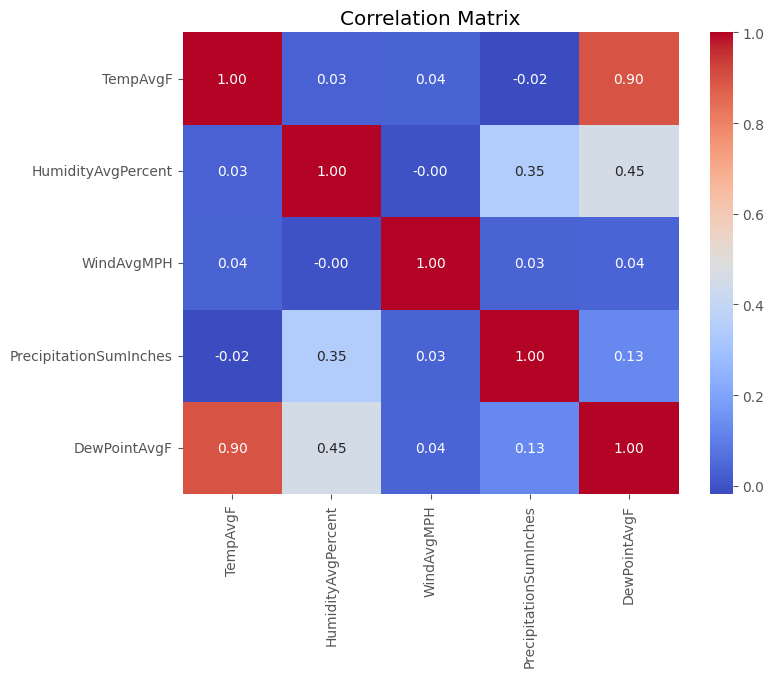

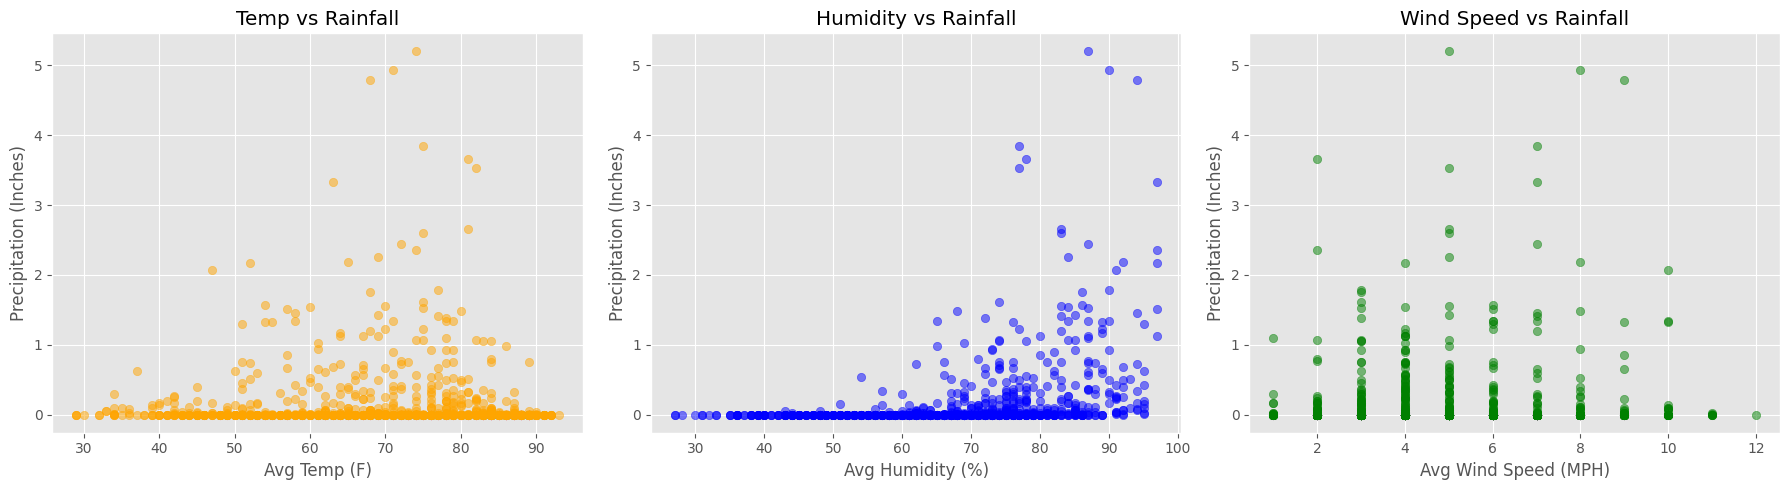

In [4]:
# ==========================================
# Step 3: Exploratory Data Analysis (EDA)
# ==========================================

# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 2. Scatter Plots: Features vs Precipitation
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Temp vs Rain
ax[0].scatter(df_clean['TempAvgF'], df_clean['PrecipitationSumInches'], color='orange', alpha=0.5)
ax[0].set_xlabel('Avg Temp (F)')
ax[0].set_ylabel('Precipitation (Inches)')
ax[0].set_title('Temp vs Rainfall')

# Humidity vs Rain
ax[1].scatter(df_clean['HumidityAvgPercent'], df_clean['PrecipitationSumInches'], color='blue', alpha=0.5)
ax[1].set_xlabel('Avg Humidity (%)')
ax[1].set_ylabel('Precipitation (Inches)')
ax[1].set_title('Humidity vs Rainfall')

# Wind vs Rain
ax[2].scatter(df_clean['WindAvgMPH'], df_clean['PrecipitationSumInches'], color='green', alpha=0.5)
ax[2].set_xlabel('Avg Wind Speed (MPH)')
ax[2].set_ylabel('Precipitation (Inches)')
ax[2].set_title('Wind Speed vs Rainfall')

plt.tight_layout()
plt.show()

4: Model Building (Linear Regression)

In [5]:
# ==========================================
# Step 4: Machine Learning Model
# ==========================================

# 1. Define Features (X) and Target (y)
X = df_clean[['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'DewPointAvgF']]
y = df_clean['PrecipitationSumInches']

# 2. Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Complete.")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")

Model Training Complete.
Intercept: -1.0044
Coefficients: [ 0.00525162  0.01631919  0.0113731  -0.00686968]


5: Evaluation and Visualization

Model Evaluation:
Mean Squared Error (MSE): 0.0657
R-Squared (R2) Score: 0.0038


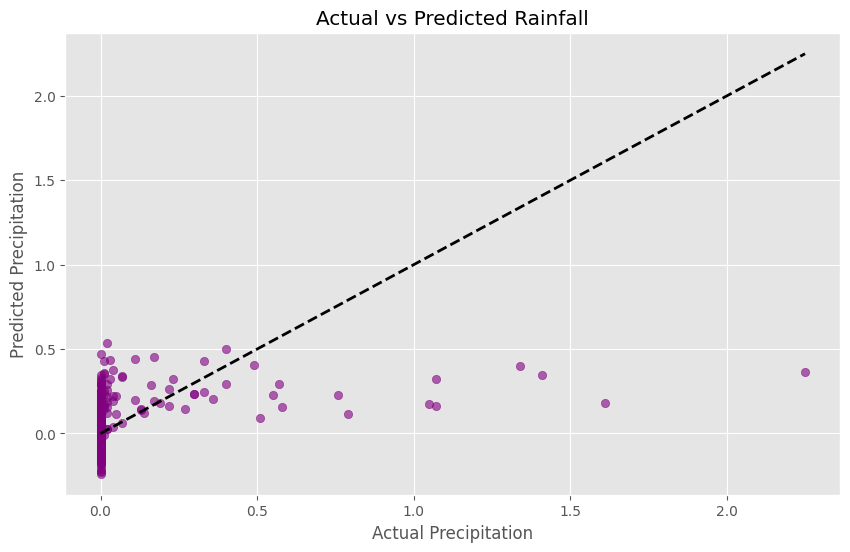


First 10 Actual vs Predicted values:
   Actual  Predicted
0    0.00   0.023973
1    0.03   0.322814
2    0.01   0.165351
3    0.00  -0.163186
4    0.02   0.027697
5    0.00   0.169106
6    0.00   0.101139
7    0.01   0.235115
8    0.00   0.084671
9    0.00   0.131688


In [6]:
# ==========================================
# Step 5: Evaluation and Visualization
# ==========================================

# 1. Make Predictions on the Test Set
y_pred = model.predict(X_test)

# 2. Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R2) Score: {r2:.4f}")

# 3. Visualize Actual vs Predicted Rainfall
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Rainfall")
plt.show()

# 4. Compare First 10 Values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nFirst 10 Actual vs Predicted values:")
print(comparison_df.head(10))